# Radioastronomia 1 2017/18
## Sprawozdanie - ćw. 2a
## Wyznaczenie charakterystyki kierunkowej i pomiar powierzchni efektywnej anteny RT-15
### Dawid Kubicki

Celem ćwiczenia było zbadanie charakterystyki kierunkowej (w tym przypadku parametrów listka głównego) krakowskiego radioteleskopu. W tym celu obserwowano radioźródło Cas A, które można uznać w tym przypadku za źródło punktowe. 

Ponadto mamy wyznaczyć powierzchnię efektywną anteny $A_{eff}$ i inne parametry charakteryzujące radioteleskop.

Wszsytkie kalibracje dokonywano z dodatkowym tłumieniem $10dB$. Pomiary wstępnie przetworzono w programie OOD.

Liczba punktow pomiarowych: 4901


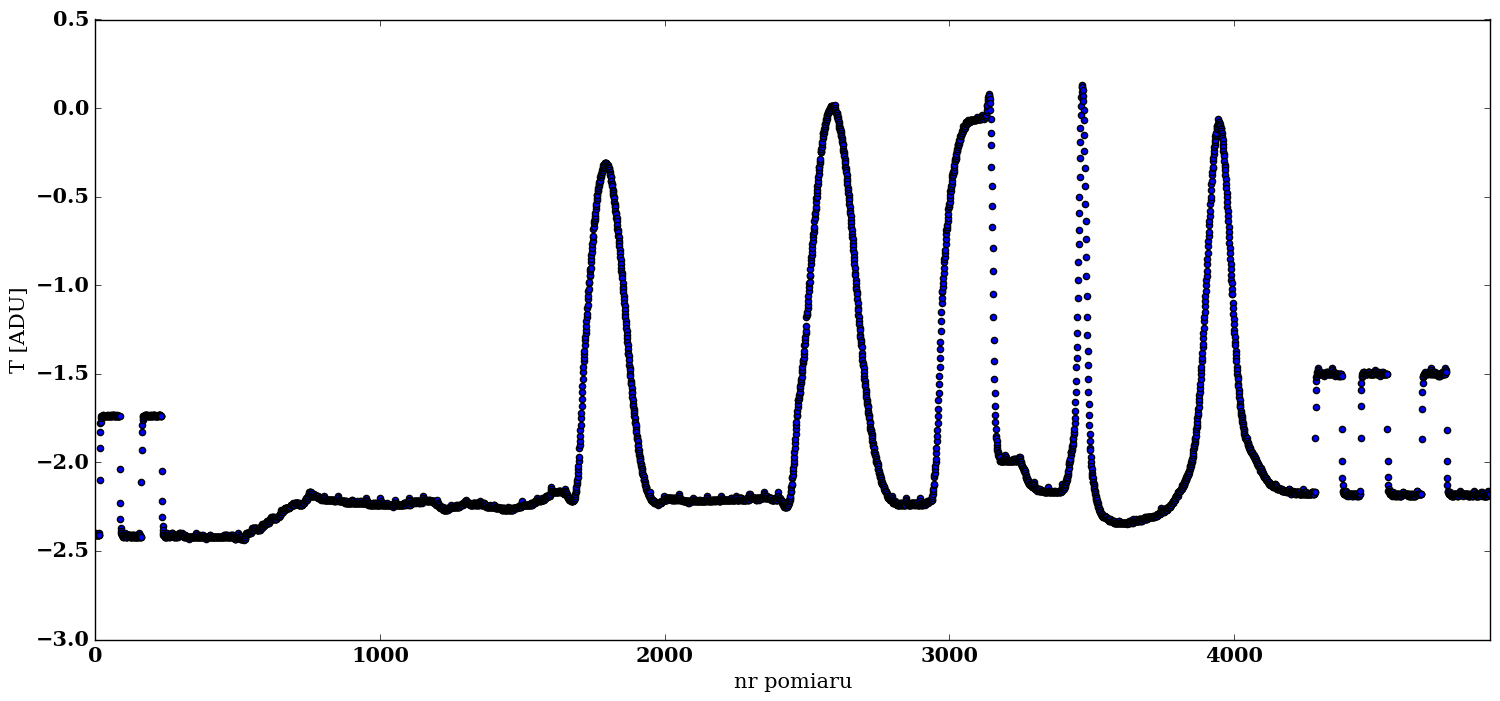

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)

def load_data(filename):
    with open(filename) as f:
        res = []
        for line in f:
            res.append(line.split())
        return np.array(res).astype(np.float)
        
data = load_data('/home/dawid/radioastronomy/2a/2ADEC.txt')
print("Liczba punktow pomiarowych: " + str(len(data)))

data_count = len(data)
sig = [d[2] for d in data]
nr = np.arange(data_count)

plt.figure(figsize=(18, 8), dpi= 80)
plt.scatter(nr, sig)
plt.xlim([0,data_count])
plt.xlabel("nr pomiaru")
plt.ylabel("T [ADU]")
plt.show()

Podczas tego pomiary wykonano 2 razy kalibrackę bez tłumienia, najechano w okolice Cas A, dokonano niedokładnego skanu wzdłuż kąta godzinnego, poprawiono współprzędne, znowu przejechano wzdłuż kąta godzinnego oraz dokonano 2 skany w deklinacji (z różną prędkością), a na koniec wykonano trzykrotnie kalibrację. 

Poniżej pokazano jak zmieniała się deklinacja i rektascensja punktu, na który nakierowany był radioteleskop.
Przerywaną linią oznaczono współrzędne obiektu.

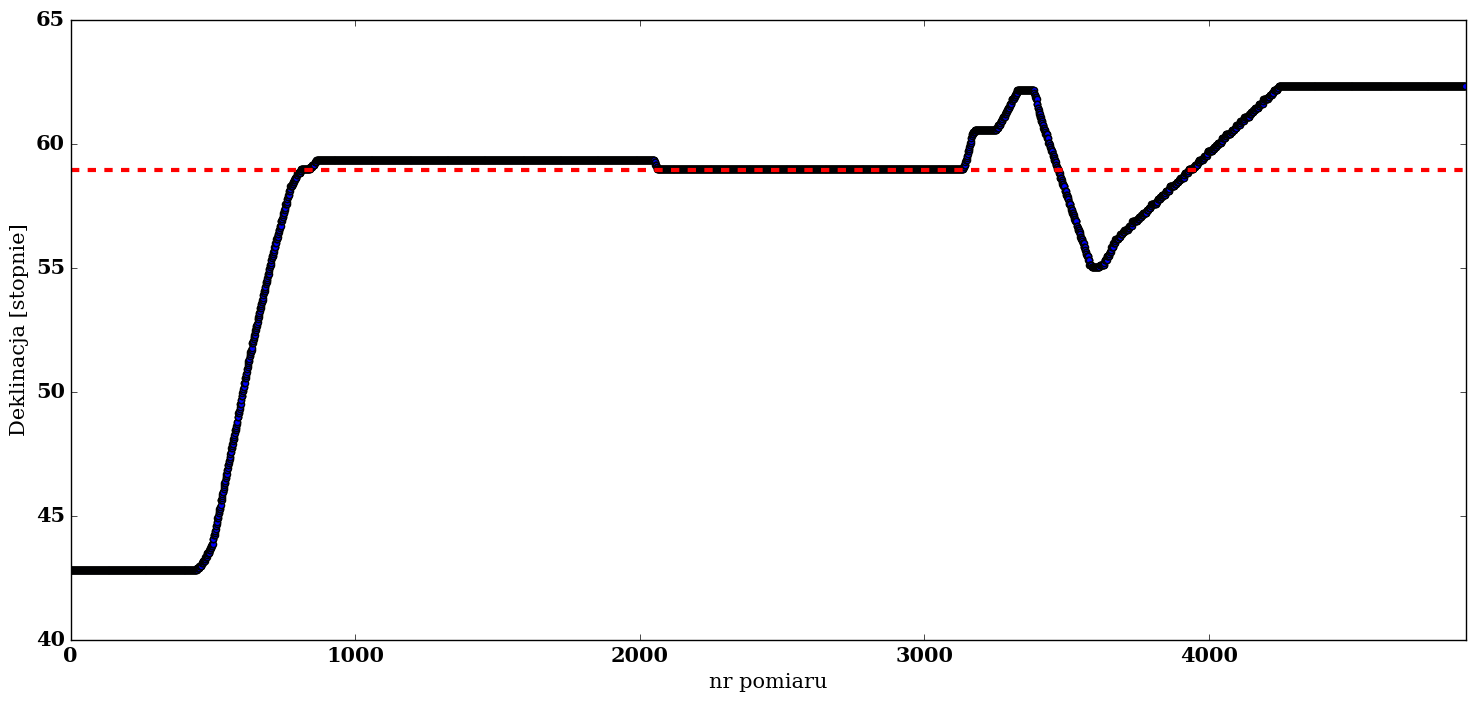

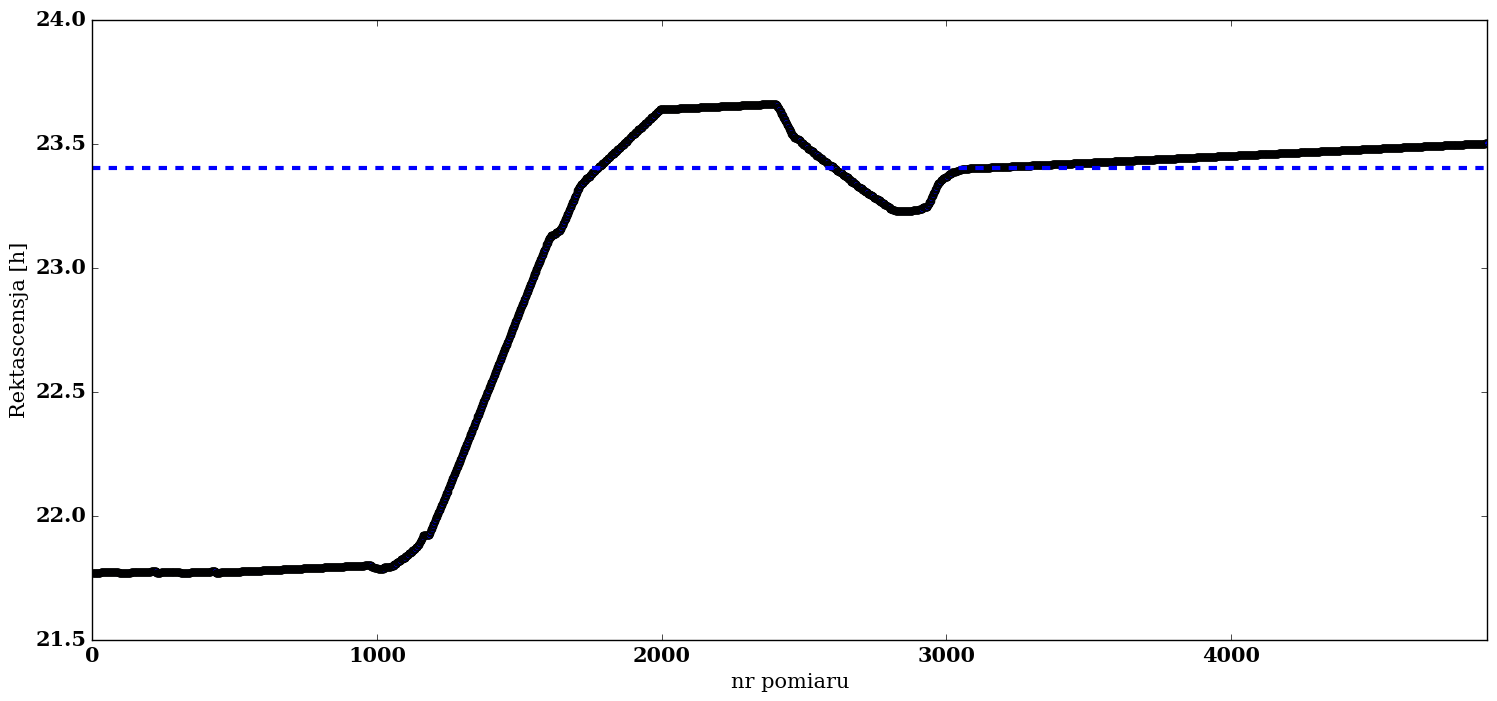

In [2]:
decs = [d[1] for d in data]
ras = [d[0] for d in data]

casa_dec = 58.93583
casa_ra = 23.40306

plt.figure(figsize=(18, 8), dpi= 80)
plt.scatter(nr, decs)
plt.xlim([0,data_count])
plt.xlabel("nr pomiaru")
plt.ylabel("Deklinacja [stopnie]")
plt.axhline(y=casa_dec, color='r', linestyle='--', linewidth=3)


plt.figure(figsize=(18, 8), dpi= 80)
plt.scatter(nr, ras)
plt.xlim([0,data_count])
plt.xlabel("nr pomiaru")
plt.ylabel("Rektascensja [h]")
plt.axhline(y=casa_ra, color='b', linestyle='--', linewidth=3)
plt.show()

Najpierw podobnie jak w poprzednich ćwiczeniach wyznaczymu przelicznik z jednostek przetwornika analogowo-cyfrowego na kelwiny. Wykrzystamy pierwszą kalibrację, jako że końcowa jest bardziej zaszumiona co wynika prawdopodobnie, z faktu, że wykonano ją w okolicach Drogi Mlecznej.

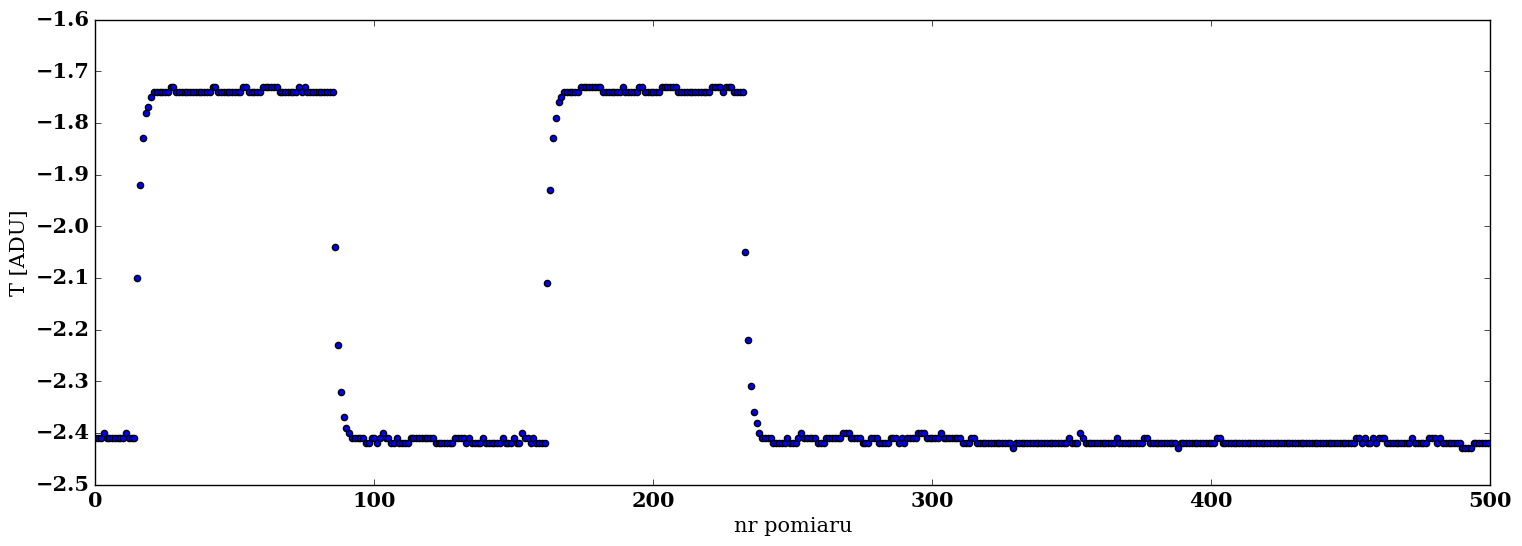

-1.7368 0.00466476151588 -2.41676666667 0.00570487121288
12.7506250306 0.194449676891


In [3]:
start_sig = sig[:500]

plt.figure(figsize=(18, 6), dpi= 80)
plt.scatter(nr[:500], start_sig)
plt.xlim([0,500])
plt.xlabel("nr pomiaru")
plt.ylabel("T [ADU]")
plt.show()

cal_sig = np.concatenate([sig[30:80], sig[175:225]])
sys_sig = np.concatenate([sig[95:145], sig[250:500]])

t_cal = np.mean(cal_sig)
dt_cal = np.std(cal_sig)

t_sys = np.mean(sys_sig)
dt_sys = np.std(sys_sig)

print(t_cal, dt_cal, t_sys, dt_sys)

#Wyprowadzenie w cwiczeniu 1a
def a_i(t_cal, t_sys, t_i):
    return t_i * 8670 / (t_cal - t_sys)

def delta_a_i(t_cal, t_sys, dt_cal, dt_sys, t_i):
    return t_i * 8670 * ((dt_sys+dt_cal)/(t_cal - t_sys)/(t_cal - t_sys))

a = a_i(t_cal, t_sys, 0.001)
da = delta_a_i(t_cal, t_sys, dt_cal, dt_sys, 0.001)
print(a, da)


Otrzymujemy przelicznik $$a = 12.75 \pm 0.20 \frac{K}{ADU}$$

Teraz wytniemy dwa skany w deklinacji

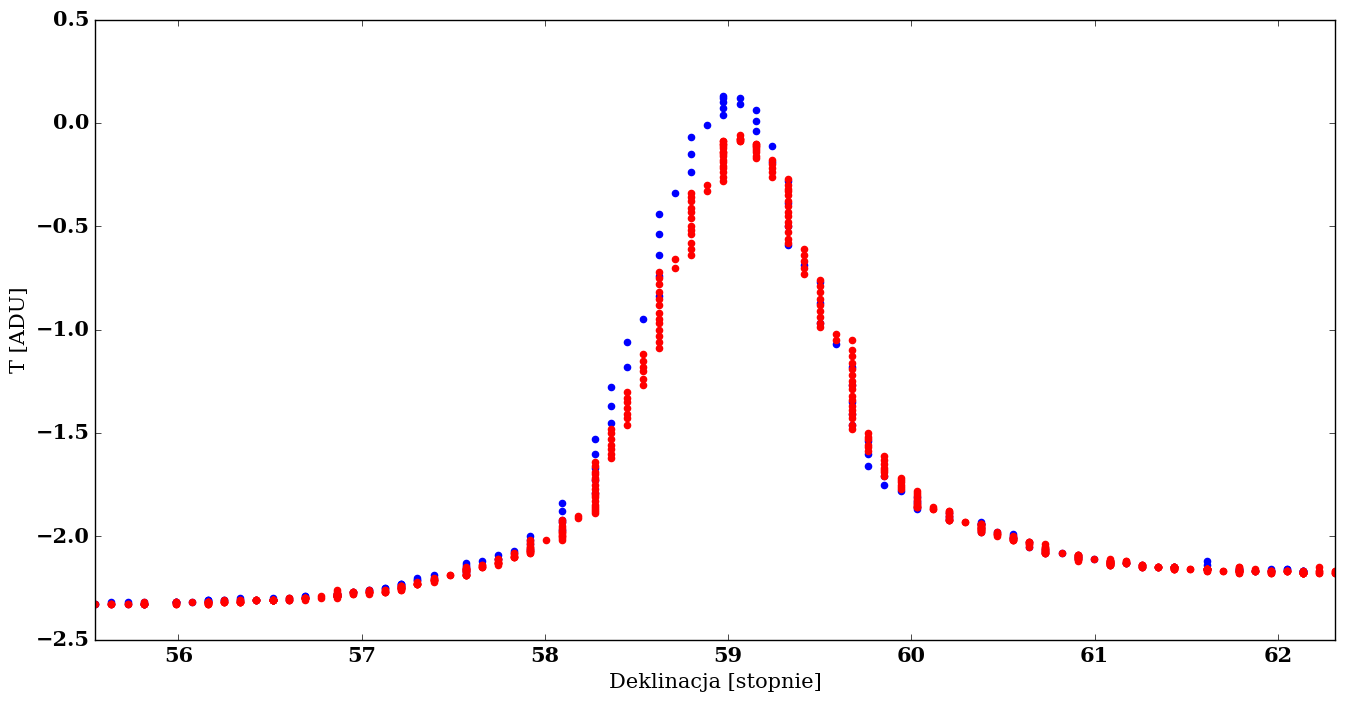

In [4]:
scand1 = data[3380:3600]
scand2 = data[3650:4250]

def plot_data_d(data, c = 'b'):
    sig = [d[2] for d in data]
    dec = [d[1] for d in data]
    plt.scatter(dec, sig, s = 20, color=c)
    plt.xlim([np.min(dec), np.max(dec)])
    plt.xlabel("Deklinacja [stopnie]")
    plt.ylabel("T [ADU]")
    
plt.figure(figsize=(16, 8))
plot_data_d(scand1, 'b')
plot_data_d(scand2, 'r')
plt.show()    

Obydwa skany w przybliżeniu się pokrywają. Niebieski skan wykonano znacznie szybciej, dlatego czerwonych punktów jest wyraźnie więcej. Widzimy dyskretyzację w deklinacji, która wynika z budowy radioteleskopu. Jeden krok w deklinacji dla RT-15 wynosi około 5 minut (prawdopodobnie jest to 90 stopni podzielone na 1024).

Na wykresie widać, że poziom poza źródłem po lewej jest niższy niż po prawej. Wynika to z faktu, że znajduje się tam Droga Mleczna, w której jest wiele słabszych radioźródeł.

Wyższy poziom sygnału dla niebieskiego skanu sugeruje, że został on wykonany bliżej radioźródła. Aby to sprawdzić pokażemy jak przebiegał skan na wykresie rektascensji od deklinacji. 

Na poniższym wykresie na niebiesko oznaczono pierwszy skan, na czerwono drugi, a żółtą kropką oznaczono położenie Cas A.

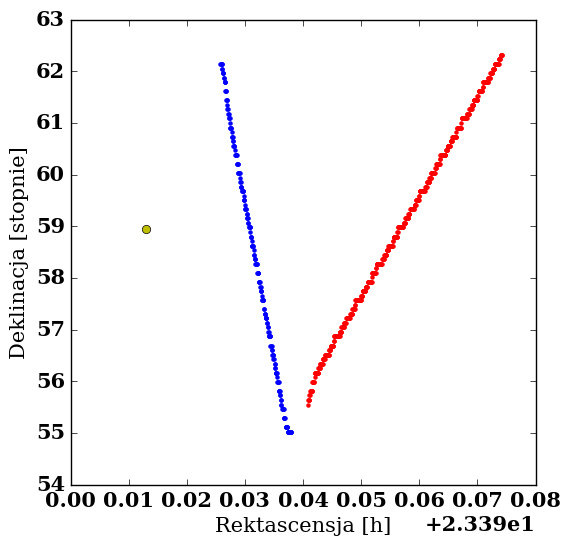

In [5]:
def get_scan_ra(scan):
    return np.array([x[0] for x in scan])

def get_scan_dec(scan):
    return np.array([x[1] for x in scan])

def get_scan_sig(scan):
    return np.array([x[2] for x in scan])

scand1ra, scand1dec, scand1sig = get_scan_ra(scand1), get_scan_dec(scand1), get_scan_sig(scand1)
scand2ra, scand2dec, scand2sig = get_scan_ra(scand2), get_scan_dec(scand2), get_scan_sig(scand2)

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(scand1ra, scand1dec, color='b', s=5)
ax.scatter(scand2ra, scand2dec, color='r', s=5)
ax.plot(casa_ra, casa_dec, 'yo')

plt.xlabel("Rektascensja [h]")
plt.ylabel("Deklinacja [stopnie]")

plt.show()    

Widzimy, że pierwszy skan został wykonany bliżej radioźródła (lecz niestety nieidealnie przez jego centrum) toteż go wykorzystamy do dalszych obliczeń. Ponadto na jego korzyść świadczy to, że pomiar ten został wykonany szybciej dzięki czemu w trakcie pomiaru mniej zmienił się kąt godzinny obserwowanego obiektu.

Można by próbować otrzymać parametry listka głównego dopasowując dwuwymiarowy rozkład Gaussa do otrzymanych punktów, ale dla prostoty załóżmy, że pierwszy skan jest odpowiednim skanem w deklinacji.
Dopasowujemy funkcję daną wzorem
$$f(x) = a e^{\frac{(x-b)^2}{2\sigma^2}} + d$$

[  2.19648552  59.02663249   0.44495375  -2.1079856 ] [ 0.02493074  0.00552259  0.00652266  0.01332024]


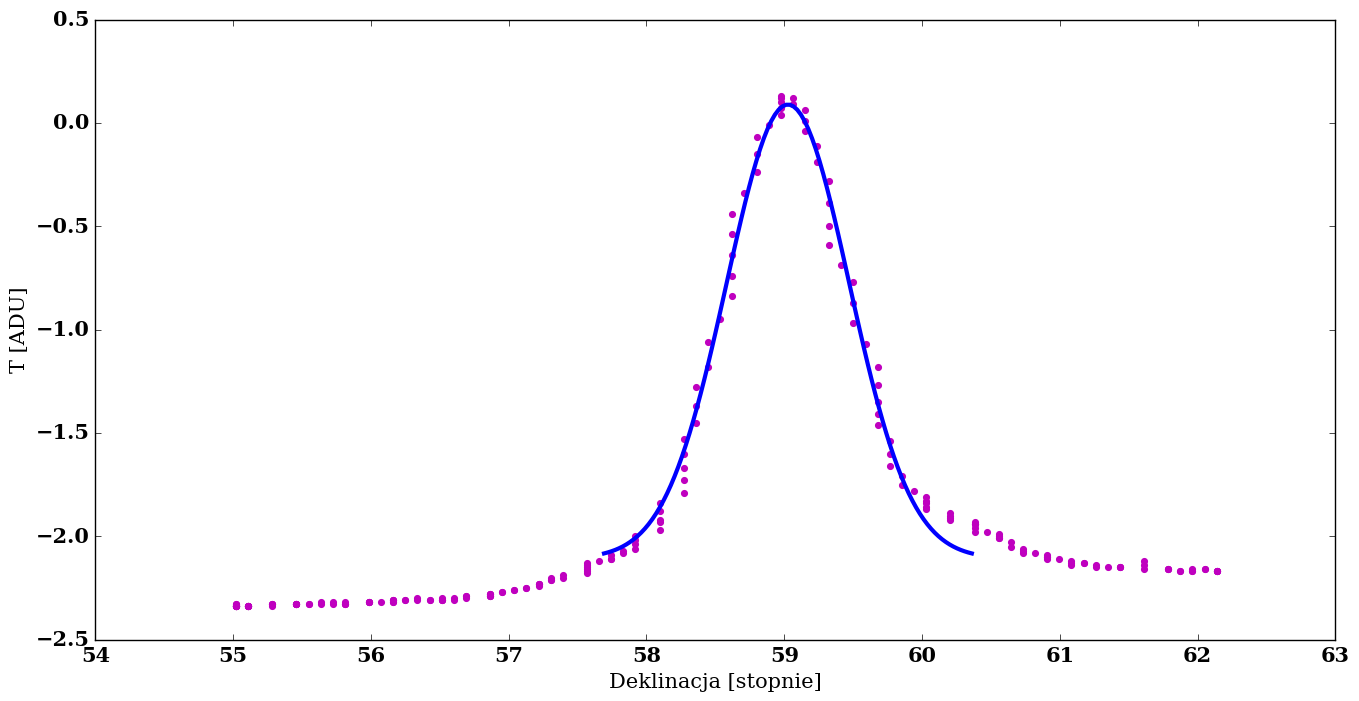

In [6]:
from scipy.optimize import curve_fit

def gauss(x, a, b, sigma, d):
    return a * np.exp(-(x-b)**2/(2*sigma**2)) + d

def fit_gauss_dec(scan, dec_min, dec_max):
    all_dec = np.array([d[1] for d in scan])
    all_sig = np.array([d[2] for d in scan])
    ind = ((dec_min <= all_dec) & (all_dec <= dec_max))
    bounds = [(1, dec_min, 0, -4), (5, dec_max, 3, -1)]
    fit_params, fit_cov = curve_fit(gauss, all_dec[ind], all_sig[ind], bounds = bounds)
    fit_err = np.sqrt(np.diag(fit_cov))
    return fit_params, fit_err

fit_params1, fit_err1 = fit_gauss_dec(scand1, 57, 61)
print(fit_params1, fit_err1)

def plot_gauss(fit_params):
    a, b, c, d = fit_params
    args = np.linspace(b-3*c, b+3*c, 100)
    vals = [gauss(x, a, b, c, d) for x in args]
    plt.plot(args, vals, linewidth=3)


plt.figure(figsize=(16, 8))
plt.scatter(scand1dec, scand1sig, s = 17, color='m')
plot_gauss(fit_params1)
plt.xlabel("Deklinacja [stopnie]")
plt.ylabel("T [ADU]")
plt.show()    


In [7]:
from IPython.display import display, HTML
def df_to_html(df, format = "{:.3f}"):
    styles = [
        dict(selector="th", props=[("font-size", "110%"), ("text-align", "center")]),
        dict(selector="td", props=[("text-align", "center")])
    ]
    html = df.style.set_table_styles(styles).format(format).render()
    return html

def adu_to_k(t_adu, dt_adu, a, da):
    return a*t_adu, abs(t_adu)*da + a*dt_adu

def beam_data(fit_params, fit_err, a, da):
    h_adu = fit_params[0]
    h_adu_err = fit_err[0]
    h, h_err = adu_to_k(h_adu, h_adu_err, a, da)
    center, center_err = fit_params[1], fit_err[1]
    dev, dev_err = 2.35*fit_params[2], 2.35*fit_err[2]
    return [h, h_err, center, center_err, dev, dev_err]

df_cols = ['Wysokosc listka [K]', '∆ wys. listka [K]',
            'Srodek listka [°]', '∆ sr. listka [°]',
            'Szerokosc polowkowa [°]', '∆ szer. pol [°]']

    
df1 = pd.DataFrame(data=[beam_data(fit_params1, fit_err1, a, da)],
                   columns=df_cols, index = ['Listek glowny (dec)'])

HTML(df_to_html(df1))

Dokonamy analogicznej analizy dla pomiarów w kącie godzinnym.

Liczba punktow pomiarowych: 3778


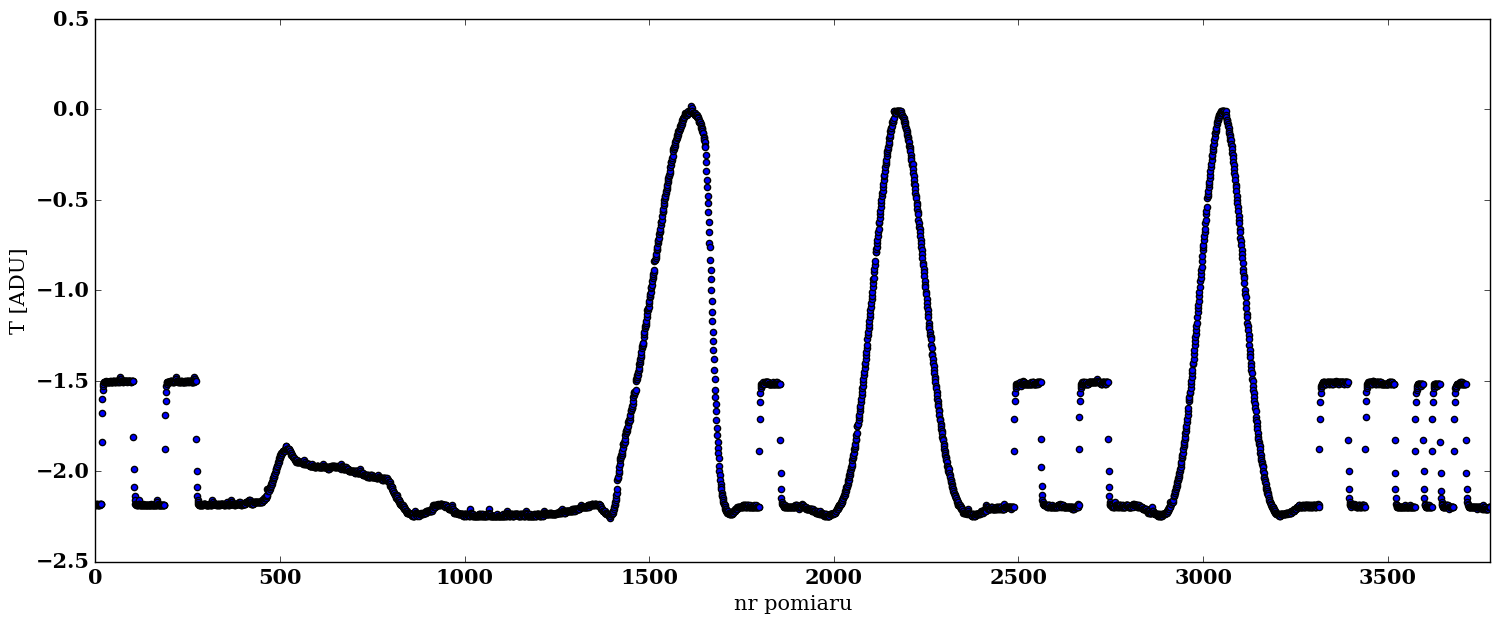

In [8]:
data = load_data('/home/dawid/radioastronomy/2a/2AGODZ.txt')
print("Liczba punktow pomiarowych: " + str(len(data)))

data_count = len(data)
sig = [d[2] for d in data]
nr = np.arange(data_count)

plt.figure(figsize=(18, 7), dpi= 80)
plt.scatter(nr, sig)
plt.xlim([0,data_count])
plt.xlabel("nr pomiaru")
plt.ylabel("T [ADU]")
plt.show()

Dla kąta godzinnego wykonano trzy pełne skany. W trakcie pierwszego zmieniono w jej trakcie prędkość prowadzenia radioteleskopu, ale po przeliczeniu współrzędnych na rektascensję nie powinno to powodować problemów.

Wykorzystamy kalibrację wykonaną pod koniec pomiarów.

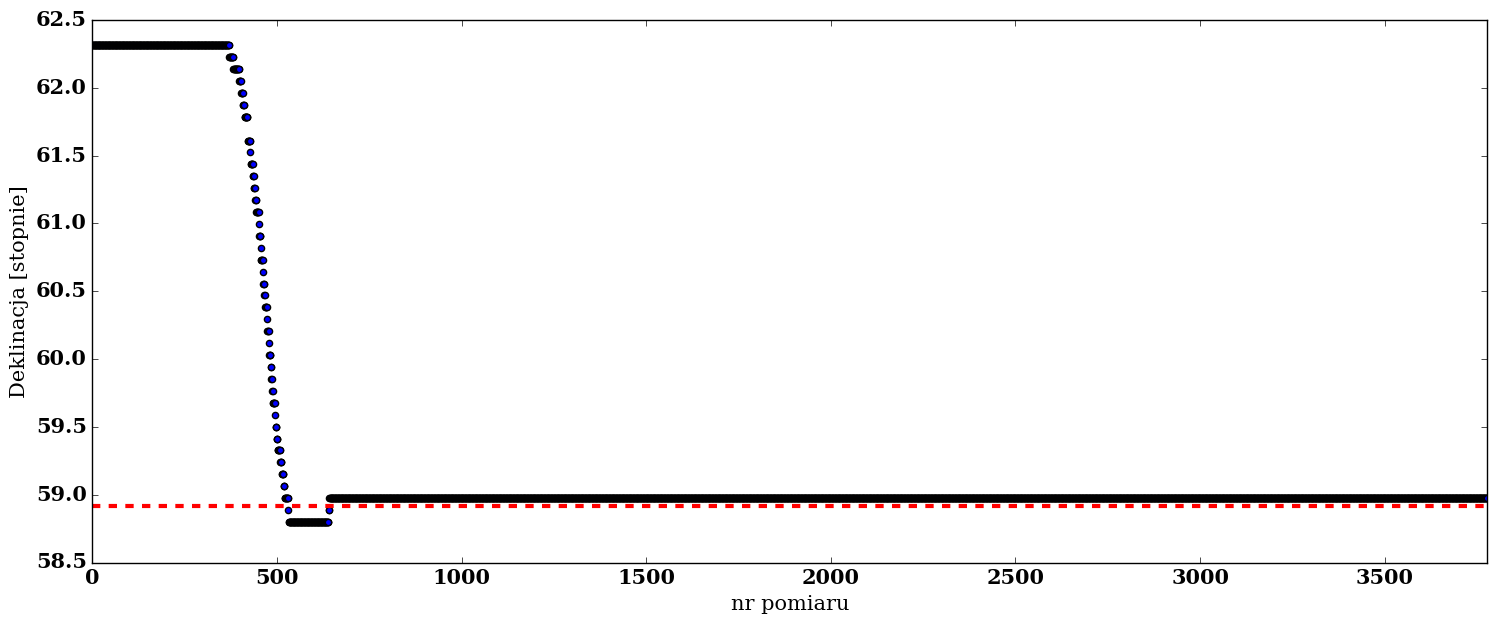

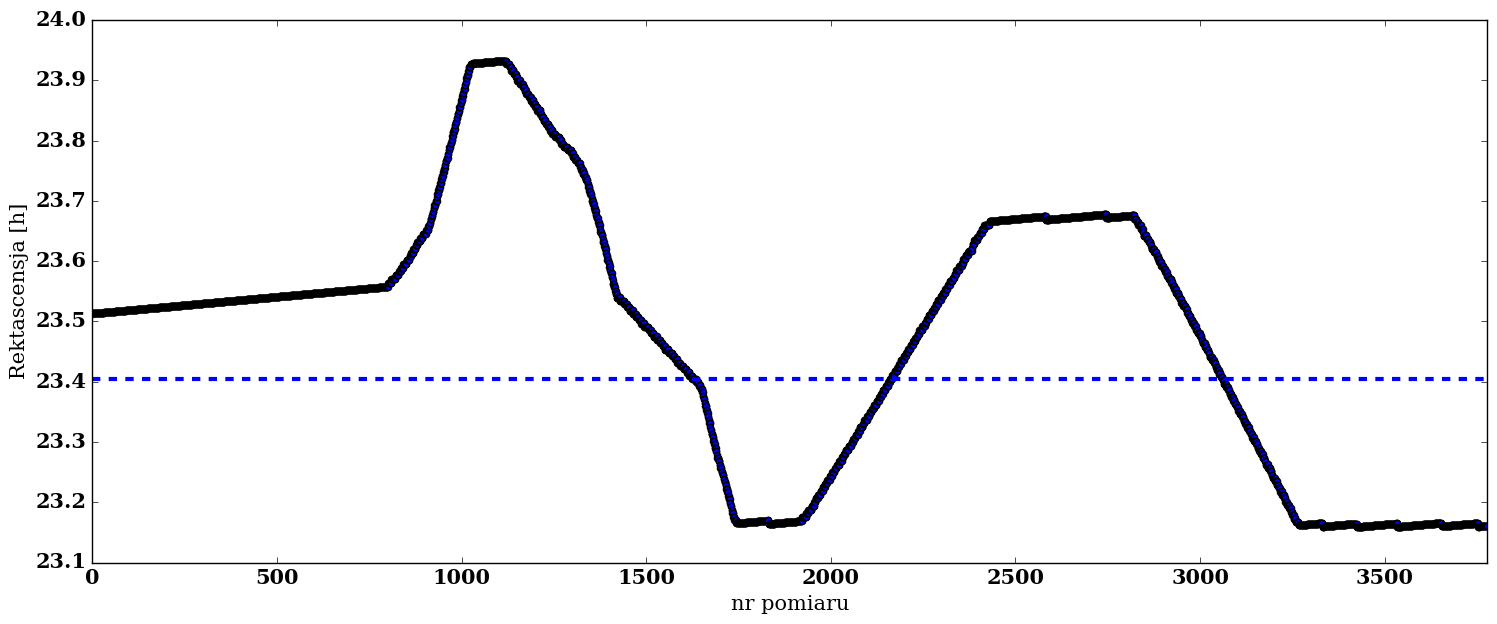

In [9]:
decs = [d[1] for d in data]
ras = [d[0] for d in data]

casa_dec = 58.9136
casa_ra = 23.4039

plt.figure(figsize=(18, 7), dpi= 80)
plt.scatter(nr, decs)
plt.xlim([0,data_count])
plt.xlabel("nr pomiaru")
plt.ylabel("Deklinacja [stopnie]")
plt.axhline(y=casa_dec, color='r', linestyle='--', linewidth=3)


plt.figure(figsize=(18, 7), dpi= 80)
plt.scatter(nr, ras)
plt.xlim([0,data_count])
plt.xlabel("nr pomiaru")
plt.ylabel("Rektascensja [h]")
plt.axhline(y=casa_ra, color='b', linestyle='--', linewidth=3)
plt.show()

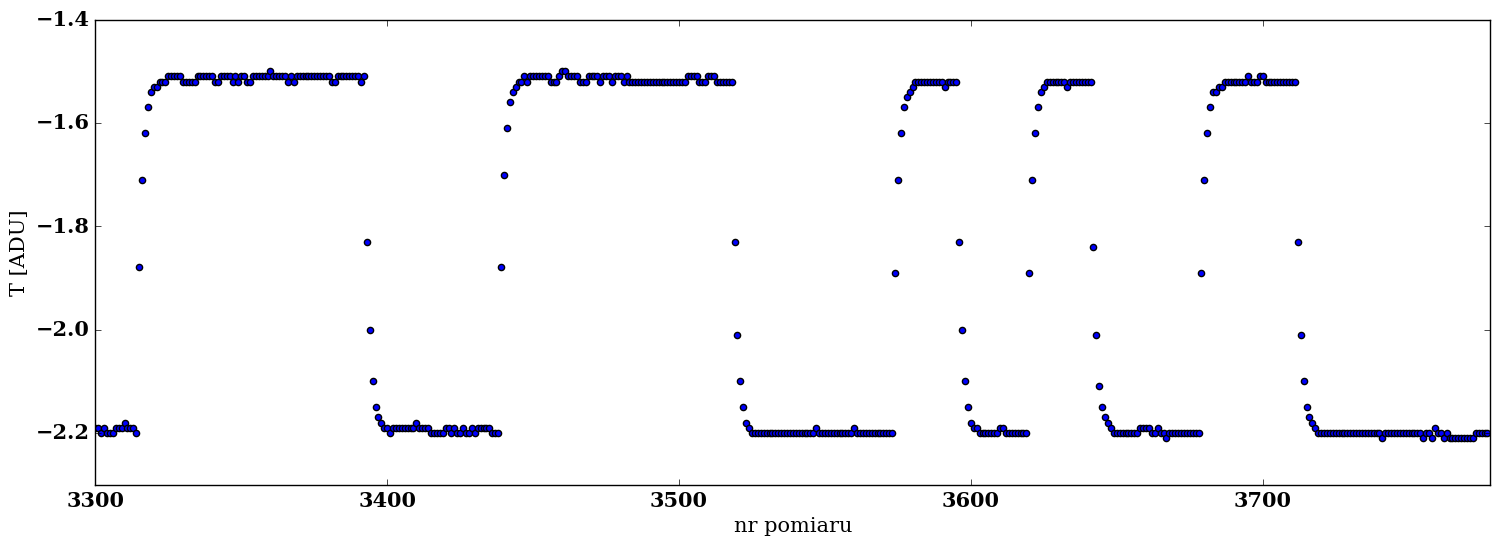

-1.51365217391 0.00532923598123 -2.19959183673 0.00569968981378
12.6395956815 0.203226567009


In [10]:
end_sig = sig[3300:]

plt.figure(figsize=(18, 6), dpi= 80)
plt.scatter(nr[3300:], end_sig)
plt.xlim([3300, 3778])
plt.xlabel("nr pomiaru")
plt.ylabel("T [ADU]")
plt.show()

cal_sig = np.concatenate([sig[3325:3380], sig[3450:3510]])
sys_sig = np.concatenate([sig[3405:3425], sig[3730:], sig[3535:3565]])

t_cal = np.mean(cal_sig)
dt_cal = np.std(cal_sig)

t_sys = np.mean(sys_sig)
dt_sys = np.std(sys_sig)

print(t_cal, dt_cal, t_sys, dt_sys)

a = a_i(t_cal, t_sys, 0.001)
da = delta_a_i(t_cal, t_sys, dt_cal, dt_sys, 0.001)
print(a, da)

Otrzymujemy przelicznik $$a = 12.64 \pm 0.21 \frac{K}{ADU}$$
Przyjmuje tę samą wartość w zakresie błędu pomiarowego, co dla skanów w deklinacji. Nie powinno to dziwić, jako że nie nastąpiła w tym czasie zmiana ustawień radioteleskopu.


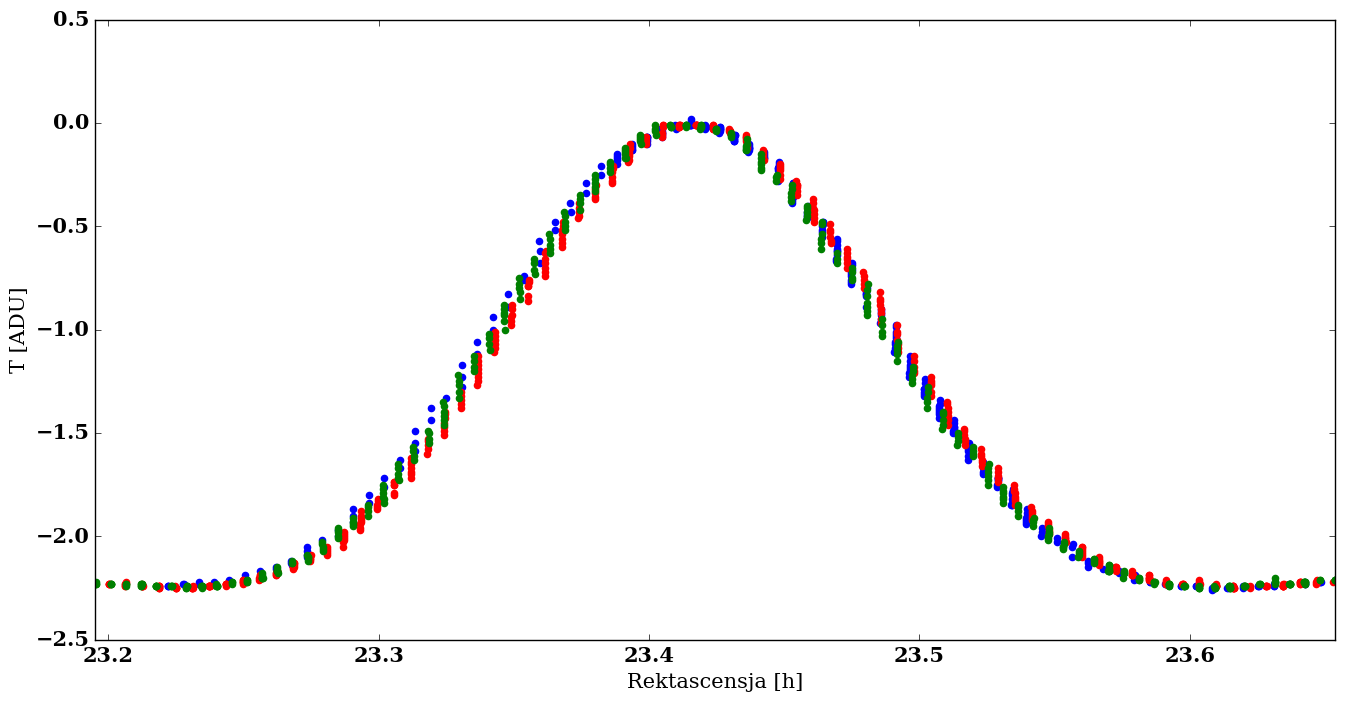

In [11]:
scant1 = data[1150:1720]
scant2 = data[1930:2410]
scant3 = data[2840:3240]

def plot_data_ra(data, c = 'b'):
    sig = [d[2] for d in data]
    ra = [d[0] for d in data]
    plt.scatter(ra, sig, s = 20, color=c)
    plt.xlim([np.min(ra), np.max(ra)])
    plt.xlabel("Rektascensja [h]")
    plt.ylabel("T [ADU]")
    
plt.figure(figsize=(16, 8))
plot_data_ra(scant1, 'b')
plot_data_ra(scant2, 'r')
plot_data_ra(scant3, 'g')
plt.show()    


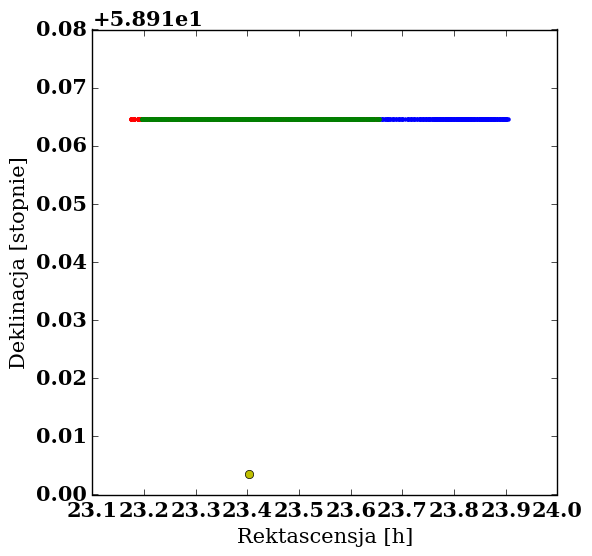

In [12]:
scant1ra, scant1dec, scant1sig = get_scan_ra(scant1), get_scan_dec(scant1), get_scan_sig(scant1)
scant2ra, scant2dec, scant2sig = get_scan_ra(scant2), get_scan_dec(scant2), get_scan_sig(scant2)
scant3ra, scant3dec, scant3sig = get_scan_ra(scant3), get_scan_dec(scant3), get_scan_sig(scant3)

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(scant1ra, scant1dec, color='b', s=5)
ax.scatter(scant2ra, scant2dec, color='r', s=5)
ax.scatter(scant3ra, scant3dec, color='g', s=5)
ax.plot(casa_ra, casa_dec, 'yo')

plt.xlabel("Rektascensja [h]")
plt.ylabel("Deklinacja [stopnie]")

plt.show()    

Wszystkie trzy skany wykonano wzłuż tego samego łuku na sferze niebieskiej. Oddalenie skanu od obiektu Cas A wynika z możliwości ustawienia teleskopu w deklinacji. Do pomiarów ze wszystkich 3 skanów dopasujemy jedną wspólną krzywą Gaussa.

[  2.30888138  23.41656394   0.06693591  -2.30563713] [  3.44784917e-03   8.51648524e-05   1.43256665e-04   3.14822521e-03]


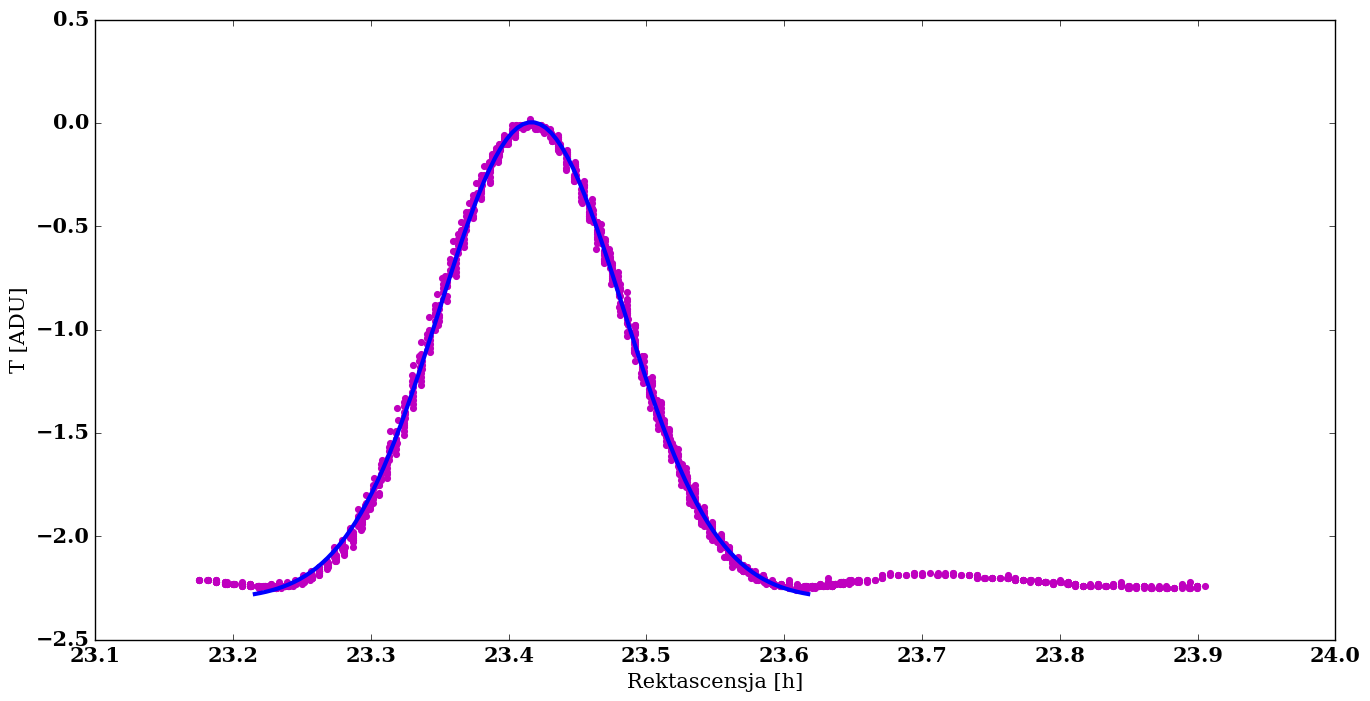

In [13]:
def fit_gauss_ra(scan, ra_min, ra_max):
    all_ra = np.array([d[0] for d in scan])
    all_sig = np.array([d[2] for d in scan])
    ind = ((ra_min <= all_ra) & (all_ra <= ra_max))
    bounds = [(1, ra_min, 0, -3), (5, ra_max, 1, 0)]
    fit_params, fit_cov = curve_fit(gauss, all_ra[ind], all_sig[ind], bounds = bounds)
    fit_err = np.sqrt(np.diag(fit_cov))
    return fit_params, fit_err

fit_params2, fit_err2 = fit_gauss_ra(np.concatenate([scant1, scant2, scant3]), 23.2, 23.6)
print(fit_params2, fit_err2)
plt.figure(figsize=(16, 8))
plt.scatter(np.concatenate([scant1ra, scant2ra, scant3ra]),
            np.concatenate([scant1sig, scant2sig, scant3sig]), s = 17, color='m')
plot_gauss(fit_params2)
plt.xlabel("Rektascensja [h]")
plt.ylabel("T [ADU]")
plt.show()    


Przy wyliczaniu parametrów listka w rektascensji dla wygody przeliczymy $h$ na stopnie. Ponadto należy pamiętać, że rektascensja zmienia się różnie w zależności od deklinacji, toteż musimy odpowiednio uwzględnić $cos \delta$, by przeliczyć na taką szerokość listka, jaka byłaby zmierzona na równiku niebieskim.

In [14]:
from math import cos, pi

def beam_data_ra(fit_params, fit_err, a, da, dec):
    h_adu = fit_params[0]
    h_adu_err = fit_err[0]
    h, h_err = adu_to_k(h_adu, h_adu_err, a, da)
    center, center_err = fit_params[1], fit_err[1]
    dev, dev_err = 2.35*fit_params[2], 2.35*fit_err[2]
    center = center/24.0*360.0
    center_err = center_err/24.0*360.0
    dev = dev/24.0*360.0*cos(dec*pi/180)
    dev_err = dev_err/24.0*360.0*cos(dec*pi/180)
    return [h, h_err, center, center_err, dev, dev_err]


df2 = pd.DataFrame(data=[beam_data_ra(fit_params2, fit_err2, a, da, dec=58.97)],
                   columns=df_cols, index = ['Listek glowny (ra)'])

HTML(df_to_html(df2, format = "{:.3f}"))

Dla komplentości poniżej przedstawiony jest wykres 3D sygnału w zależności od deklinacji i rekstascensji.

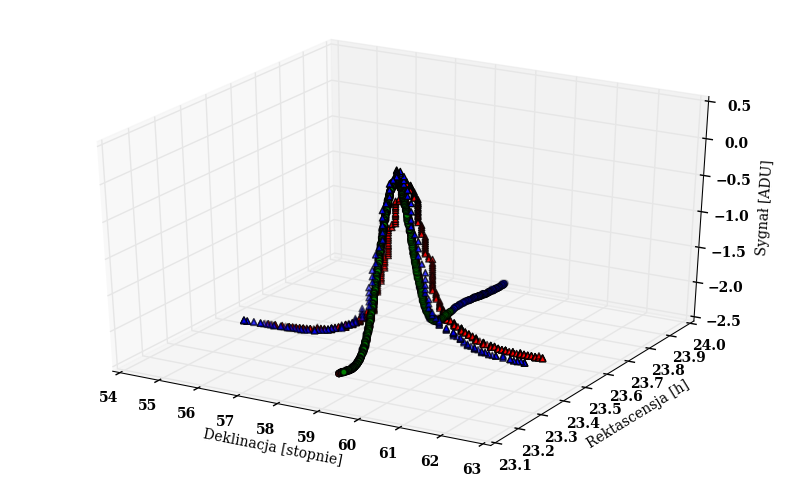

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
from math import cos

ax.scatter(scand1dec, scand1ra, scand1sig, c='b', marker='^')
ax.scatter(scand2dec, scand2ra, scand2sig, c='r', marker='^')

ax.scatter(scant1dec, scant1ra, scant1sig, c='b', marker='o')
ax.scatter(scant2dec, scant2ra, scant2sig, c='r', marker='o')
ax.scatter(scant3dec, scant3ra, scant3sig, c='g', marker='o')

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)
ax.set_xlabel('Deklinacja [stopnie]')
ax.set_ylabel('Rektascensja [h]')
ax.set_zlabel('Sygnał [ADU]')

plt.show()

Dociekliwy badacz mógłby pokusić się o dopasowanie dwuwymiarowego rozkładu Gaussa, ale na razie nie zostanie to zrobione.

Poniżej jeszcze raz obliczone szerokości połówkowe:
$$FWHM_{dec} = 1.05^\circ \pm 0.02^\circ$$
$$FWHM_{ra} = 1.22^\circ \pm 0.01^\circ$$


### Wyznaczenie powierzchni efektywnej anteny

Z programu OOD możemy odczytać strumień promieniowania Cas A na długości fali $21 cm$. Program nie podaje niepewności pomiarowej, założymy więc, że jest pomijalna.
$$S_{\nu} = 1462.9 Jy$$

Dany jest wzór dla źródła niespolaryzowanego:
$$k T_{A} = \frac{1}{2}A_{eff}S_{\nu} $$
gdzie $k$ stała Boltzmanna $k = 1.38064852(79)×10^{−23} \frac{J}{K}$, $T_{A}$ - temperatura anteny. Stąd
$$A_{eff} = \frac{2 k T_{A}}{S_{\nu}} $$

W przypadku tego ćwiczenia $T_{A}$ to różnica między sygnałem w maksimum obserwacji a poziomem szumu. Jest to oznaczana przez nas wcześniej wysokość listka. Dla skanów w deklinacji i rekstascensji otrzymaliśmy odpowiednio:
$$T_{A}^{dec} = 28.01 \pm 0.75 K $$
$$T_{A}^{ra} = 29.18 \pm 5.2 K $$
Na podstawie powyższych wyników wyliczono średnią ważoną $T_{A}$

In [16]:
from math import sqrt
t1 = 28.01
t2 = 29.18
w1 = 1.0/0.75**2
w2 = 1.0/0.52**2
tmean = (w1*t1+w2*t2)/(w1+w2)
errmean = 1.0/sqrt(w1+w2)
print(tmean, errmean)

28.800160883659505 0.4273347163279449


$$T_A^{mean} = 28.80 \pm 0.43 K $$
Wykorzystano ją do wyliczenia powierzchni efektywnej.

In [17]:
k = 1.380649e-23
sv = 1462.9
jansky_si = 1e-26
sv = sv * jansky_si
aeff = 2*k*tmean/sv
daeff = 2*k*errmean/sv
print(aeff, daeff)
ageom = 7.5**2*pi
print(ageom)
print(aeff/ageom, daeff/ageom)

54.36176543012319 0.8066159665916478
176.71458676442586
0.30762466429888785 0.004564512649241168


Prowadzi to do wartości $A_{eff} = 54.36 \pm 0.81 m^2$. Radioteleskop ma średnicę 15m, stąd powierzchnia geometryczna $A_{geom} \approx 176.7 m^2$. Prowadzi to do współczynnika wykorzystania anteny:
$$\eta = \frac{A_{eff}}{A_{geom}} = 0.308 \pm 0.005$$

### Czułość radioteleskopu

Czułość radioteleskopu wyznaczamy jako $$\Gamma = \frac{A_{eff}}{2k}$$

In [18]:
print(aeff/2/k*jansky_si, daeff/2/k*jansky_si)

0.019687033210513023 0.0002921147831895173


Czyli w naszym przypadku
$$\Gamma = 0.0197 \pm 0.0003 \frac{K}{Jy}$$

### Kąt bryłowy anteny

Kąt bryłowy anteny liczymy ze wzoru 
$$\Omega_{a} = \frac{\lambda^2}{A_{eff}}$$
gdzie $\lambda$ to długość fali na której prowadzimy obserwacje, w tym przypadku $\lambda = 21cm$.

In [19]:
omegaa = 0.21**2/aeff
domegaa = 0.21**2/(aeff**2)*daeff
print(omegaa, domegaa)

0.0008112319320586873 1.203700107658636e-05


Z pomiarów wynika, że
$$\Omega_{a} = 0.00081 \pm 0.00002 sr$$


### Współczynnik kierunkowości (zysk) anteny
Zysk anteny liczymy ze wzoru
$$G = \frac{4 \pi A_{eff} }{\lambda^2} $$

In [20]:
print(4*pi*aeff/0.21/0.21, 4*pi*daeff/0.21/0.21)

15490.478268611936 229.84660271315656


Co dla naszych pomiarów daje
$$G = 15490 \pm 230$$

### Kąt bryłowy listka głównego anteny i jego efektywność

Kąt bryłowy listka głownego anteny otrzymujemy całkując charakterystykę kierunkową po głównym listku
$$\Omega_M = \iint_M P(\Omega) d\Omega $$

Przybliżając listek przez dwuwymiarową funkcję Gaussa o maksimum równym jeden i macierzy
$\Sigma = \bigl( \begin{matrix}\sigma_{dec} & 0\\ 0 & \sigma_{ra}\end{matrix} \bigr)$ otrzymamy wzór
$$\Omega_M = 2 \pi \sigma_{dec} \sigma_{ra} = \frac{\pi}{4 ln2} FWHM_{dec} FWHM_{ra} $$

Efektywność listka głównego definiujemy jako
$$e = \frac{\Omega_m}{\Omega_a}$$

Niepewności szacujemy korzystając z metody różniczki zupełnej.
$$\Delta \Omega_M = \frac{\pi}{4 ln2}(FWHM_{ra} \Delta FWHM_{dec} + FWHM_{dec} \Delta FWHM_{ra})$$
$$ $$
$$\Delta e = \frac{\Delta \Omega_m}{\Omega_a} + \frac{\Omega_m \Delta \Omega_a}{\Omega_a^2} $$

In [21]:
from math import log

def deg_to_rad(deg):
    return deg*pi/180

x = pi/4/log(2)
fwhmd = deg_to_rad(1.05)
dfwhmd = deg_to_rad(0.02) 
fwhmr = deg_to_rad(1.22)
dfwmdr = deg_to_rad(0.01)

omegam = x * fwhmd * fwhmr
domegam = x * (fwhmd*dfwmdr + fwhmr*dfwhmd)

e = omegam/omegaa
de = domegam/omegaa + omegam*domegaa/omegaa/omegaa
print(omegam, domegam)
print(e, de)

0.0004421486315861935 1.2046047808242118e-05
0.5450335645246851 0.02293624877904262


Otrzymaliśmy wartości
$$\Omega_M = 0.00044 \pm 0.00002 sr$$
$$e = 0.545 \pm 0.023 $$


## Podsumowanie

Ćwiczenie 2a pozwoliło wyznaczyć pewne parametry radioteleskopu. Wartości wyglądają wiarygodnie. Głównym problemem było wykonanie poprawnego skanu w deklinacji, jako że ciągle zmienia się kąt godzinny obiektu na niebie. Ponadto pewne utrudnienia wprowadza bliskość Drogi Mlecznej. 